In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.io.json import json_normalize
import datetime as dt
import glob
import statistics as stat
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from scipy.optimize import curve_fit
from scipy.special import factorial
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = [16,9]

## Releases Read in

In [9]:
release_header = ['id', 'target', 'date', 'date_offset', 'name', 'comment', 'author']
# Path to release.csv, and whether to select uncompressed or ocmpressed version
# release_path = 'D:/data/open_source/release.csv'
release_path = 'C:\\Users\\Faugh\\Desktop\\DataScienceData\\popular-3k-python\\release.csv'

In [10]:
def hex_str(str):
    return bytes.fromhex((str).replace('\\x','')).decode('utf-8')

def date_str(str):
    return pd.to_datetime(str, format='%Y-%m-%dT%H:%M:%S.000Z')

In [17]:
release_df = pd.read_csv(release_path, names=release_header, converters={'date':date_str,'comment':hex_str})

In [12]:
release_df = release_df[['id','date','name','comment','author']]

In [13]:
release_df.head()

,id,date,name,comment,author
0,\xae671a0067dbeabbc3cb546705edc1f81f71a193,2015-02-03 21:58:44,\x72656c656173652d323031352d30322d3034,"Release for February 4th, 2015\n",91949
1,\x33e2c27d1ec224a54ed7ca4a6e09c352e92a227d,2013-07-05 04:58:14,\x76302e32392e31,tag version 0.29.1\n,140982
2,\x1f9bcd823807f41afaab6b74b34473531ca7eb30,2013-03-29 13:02:20,\x76332e302e30,What's new in Tornado 3.0\n===================...,207066
3,\x3206fb28a040494bac6973310e7f21f031989da6,2010-12-09 04:14:19,\x6275696c642d343639,Windows build SickBeard-win32-alpha-build469\n,875380
4,\x652fc27cf9fe9262d2c941d6385043efa41016da,2011-11-08 01:22:48,\x312e312e36,Fabric 1.1.6\n,63770


## Revisions Read in

In [23]:
rev_df = pd.read_csv('C:\\Users\\Faugh\\Desktop\\DataScienceData\\popular-3k-python\\revision.csv', header=None)
rev_df.columns = ['id', 'date', 'date_offset', 'committer_date', 'committer_date_offset', 'type', 'directory', 'message', 'author', 'committer']
rev_df = rev_df[['id', 'date']]

rev_df['id'] = rev_df['id'].apply(lambda x: x[2:])
rev_df['date'] = rev_df['date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.000Z'))

rev_df.head()

,id,date
0,01714ff5fd94a846f7dc3456a52e6f2dcd36ca0b,2015-04-02 01:11:50
1,01d76a45b817be788eab3e27a93e41c74a6d8957,2010-08-14 17:15:31
2,03ac0bf5d03af97bc7dc7c5aa67d8ee346f8cd1c,2013-09-27 17:02:55
3,05c9110ba2615d42af41a77138bc62dd18278320,2011-10-25 20:11:52
4,06de8d8e88d5b6311ea3feae369c85d157c9dfe3,2017-10-31 20:29:21


## Next Steps
### - Look into the amount of revisions on a certain day and see if there is a correlation between releases
### - See if there is a correlation between amount of revisions and releases seperated by a week etc...

In [33]:
revPerWeekCount = pd.DataFrame()
revPerWeekCount['count'] = rev_df['date'].value_counts().resample('w').apply('count')
revPerWeekCount.head()

,count
1980-01-20,2
1980-01-27,0
1980-02-03,0
1980-02-10,0
1980-02-17,0


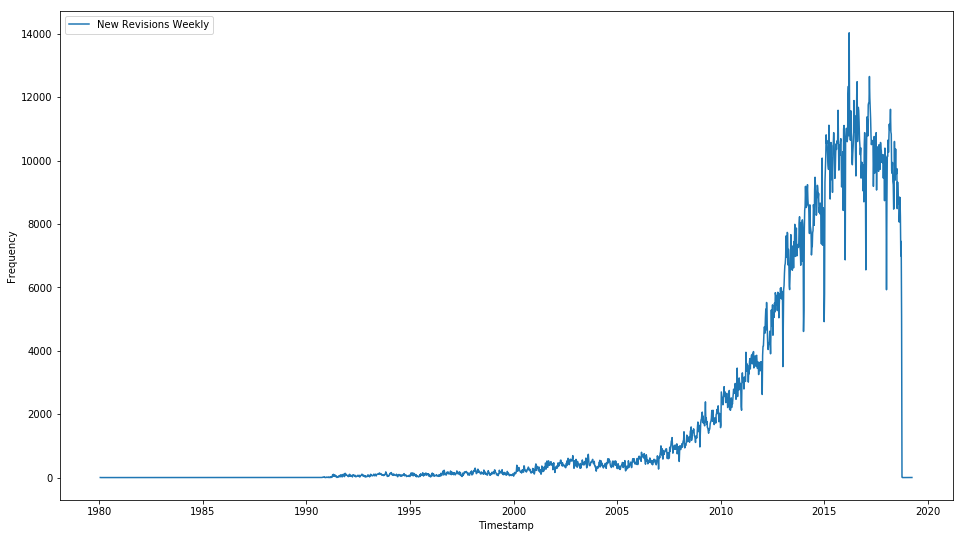

In [29]:
plt.plot(revPerWeekCount, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

In [31]:
revPerWeekShort = rev_df[(rev_df['date'] >= '2005-07-07') & (rev_df['date'] < '2018-10-01')]

In [36]:
revPerWeekShortCount = pd.DataFrame()
revPerWeekShortCount['count'] = df['date'].value_counts().resample('w').apply('count')
revPerWeekShortCount.head()

,count
2005-07-10,204
2005-07-17,529
2005-07-24,415
2005-07-31,325
2005-08-07,367


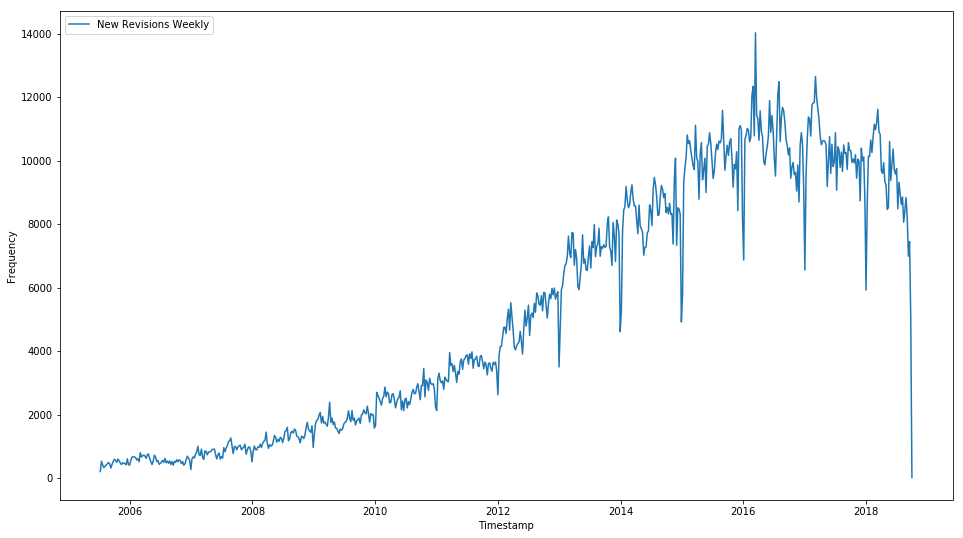

In [37]:
plt.plot(revPerWeekShortCount, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

In [38]:
revPerDayShortCount = pd.DataFrame()
revPerDayShortCount['count'] = df['date'].value_counts().resample('d').apply('count')
revPerDayShortCount.head()

,count
2005-07-07,73
2005-07-08,70
2005-07-09,22
2005-07-10,39
2005-07-11,42


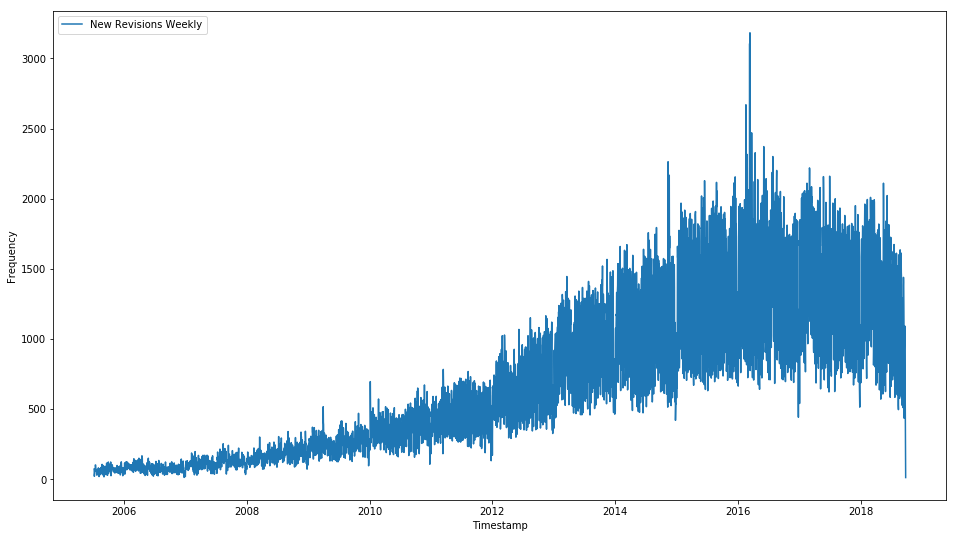

In [39]:
plt.plot(revPerDayShortCount, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

In [40]:
revPerMonthShortCount = pd.DataFrame()
revPerMonthShortCount['count'] = df['date'].value_counts().resample('m').apply('count')
revPerMonthShortCount.head()

,count
2005-07-31,1473
2005-08-31,1885
2005-09-30,2029
2005-10-31,2337
2005-11-30,1992


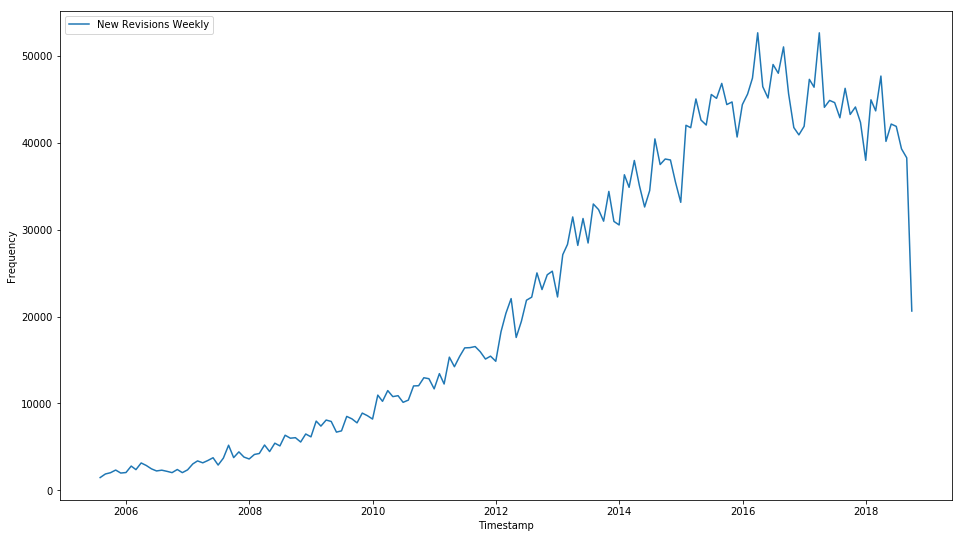

In [41]:
plt.plot(revPerMonthShortCount, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

In [42]:
revPerYearShortCount = pd.DataFrame()
revPerYearShortCount['count'] = df['date'].value_counts().resample('y').apply('count')
revPerYearShortCount.head()

,count
2005-12-31,11768
2006-12-31,29261
2007-12-31,44246
2008-12-31,65212
2009-12-31,95124


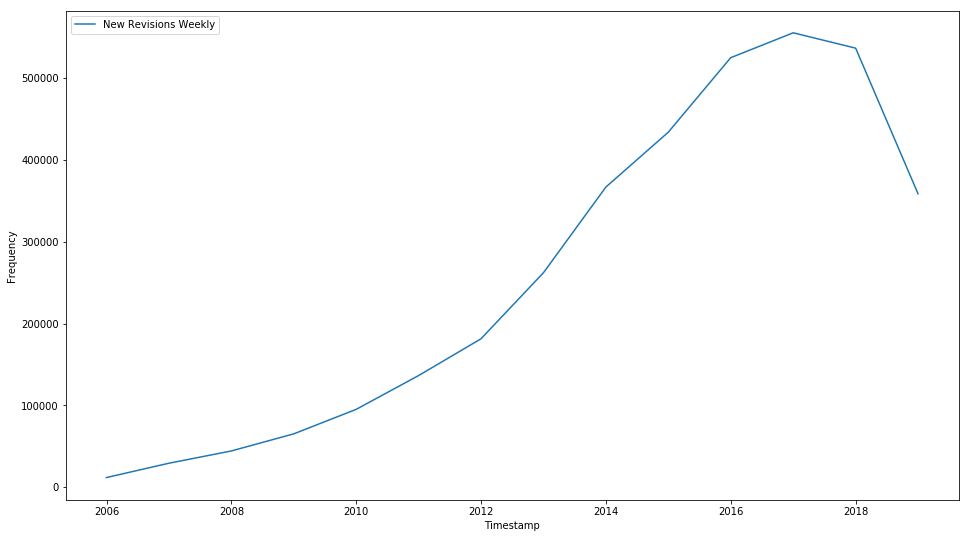

In [43]:
plt.plot(revPerYearShortCount, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

Releases Ploting

In [44]:
relShort = release_df[(release_df['date'] >= '2005-07-07') & (release_df['date'] < '2018-10-01')]

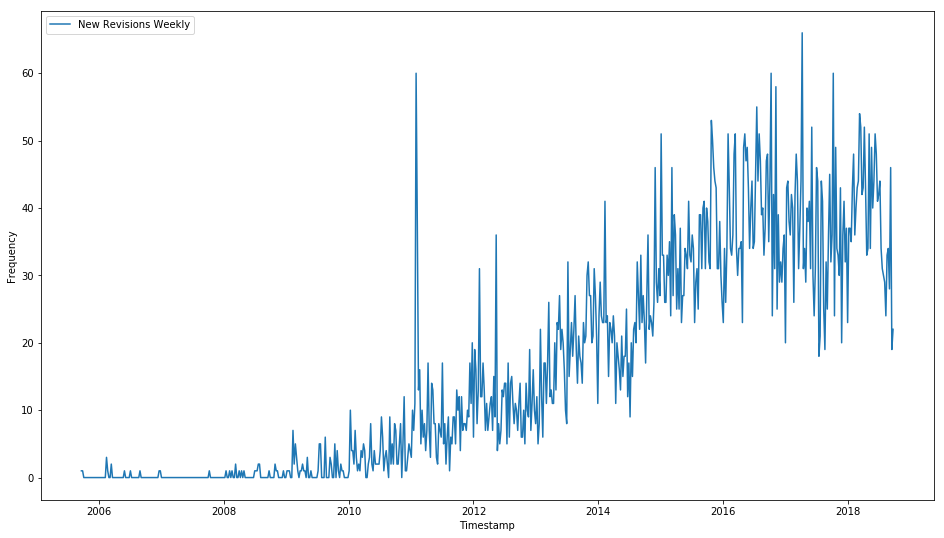

In [45]:
relPerWeekShort = pd.DataFrame()
relPerWeekShort['count'] = relShort['date'].value_counts().resample('w').apply('count')
relPerWeekShort.head()
plt.plot(relPerWeekShort, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

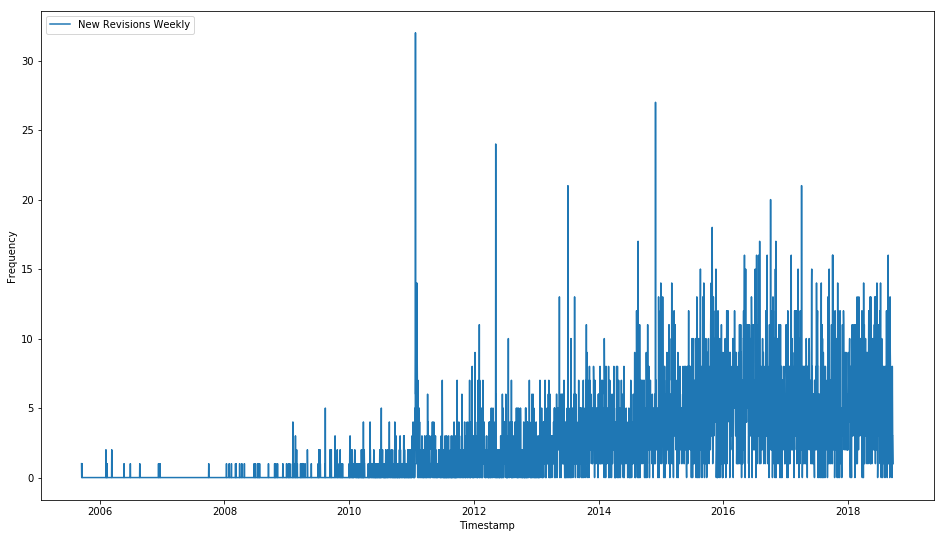

In [46]:
relPerDayShort = pd.DataFrame()
relPerDayShort['count'] = relShort['date'].value_counts().resample('d').apply('count')
relPerDayShort.head()
plt.plot(relPerDayShort, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

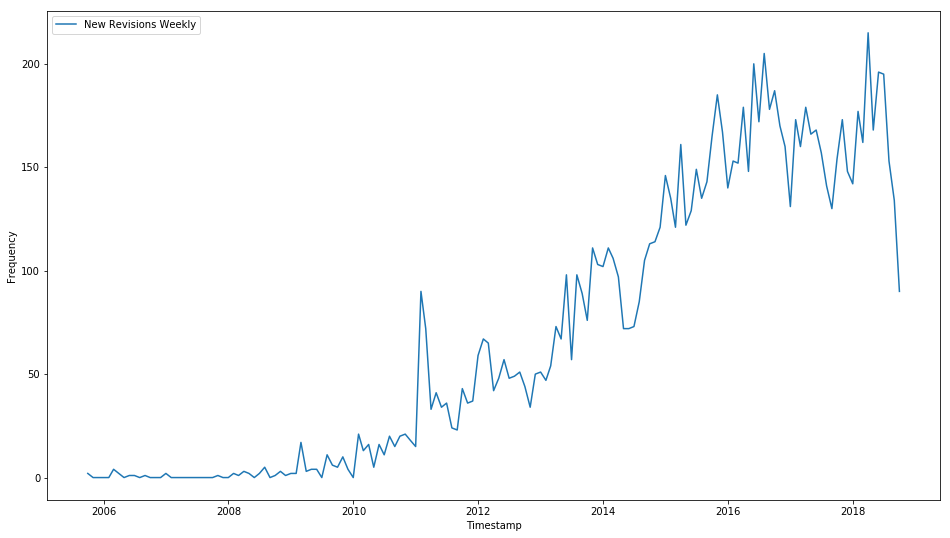

In [47]:
relPerMonthShort = pd.DataFrame()
relPerMonthShort['count'] = relShort['date'].value_counts().resample('m').apply('count')
relPerMonthShort.head()
plt.plot(relPerMonthShort, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

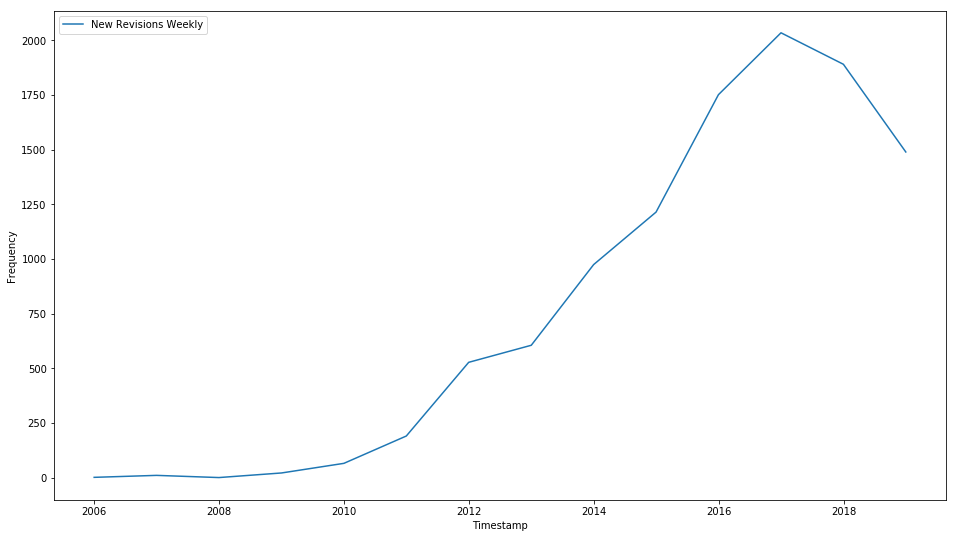

In [48]:
relPerYearShort = pd.DataFrame()
relPerYearShort['count'] = relShort['date'].value_counts().resample('y').apply('count')
relPerYearShort.head()
plt.plot(relPerYearShort, label='New Revisions Weekly')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

#### Obviously there are more Revisions per year by a huge factor than there are Releases

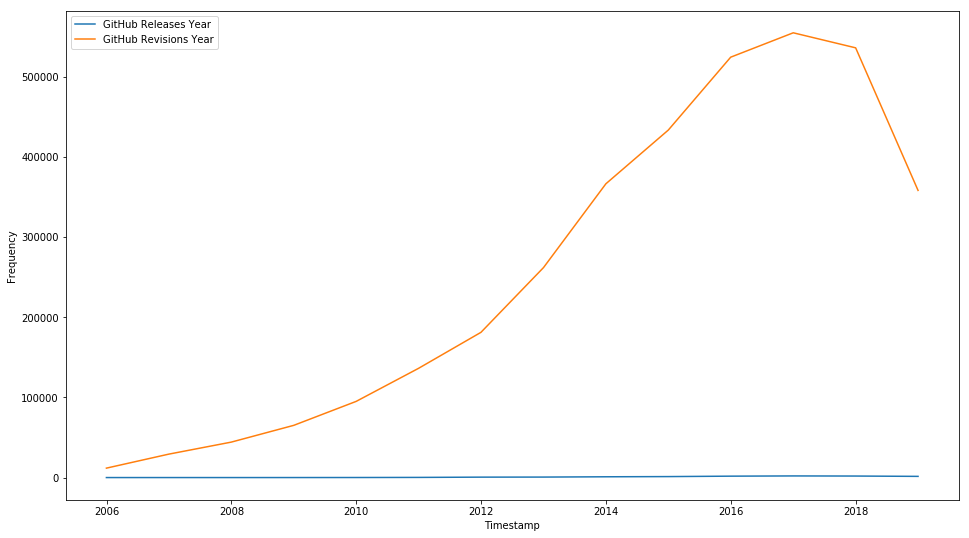

In [49]:
plt.plot(relPerYearShort, label='GitHub Releases Year')
plt.plot(revPerYearShortCount, label='GitHub Revisions Year')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

#### Plotting Both Releases Per Year and Revisions Per Year together with different scaled y-axis

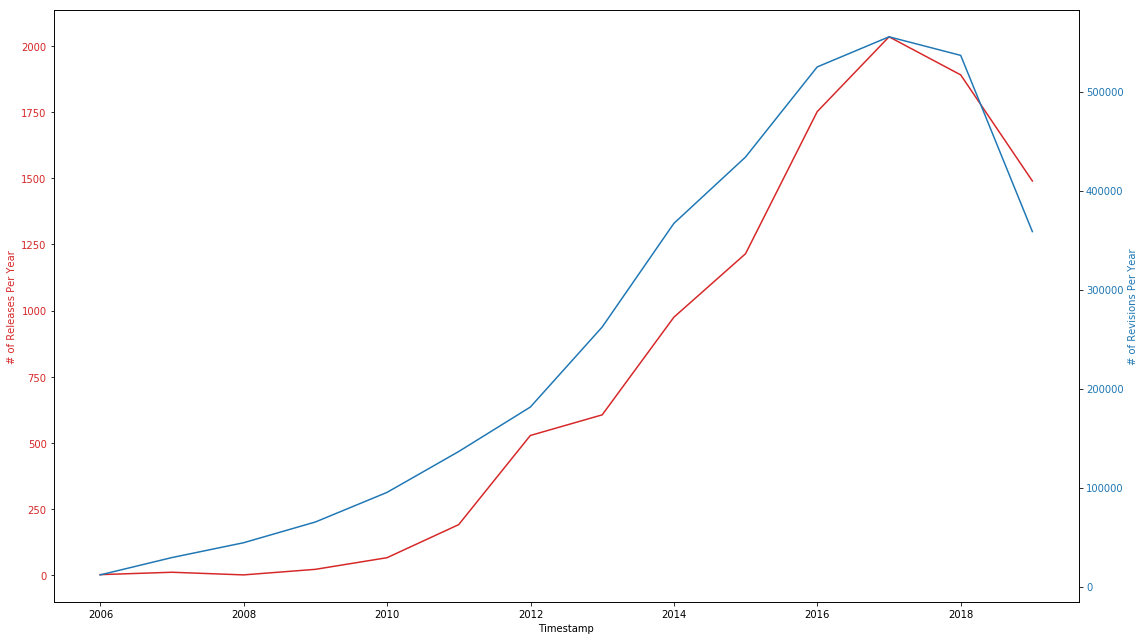

In [55]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('# of Releases Per Year', color=color)
ax1.plot(relPerYearShort, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# of Revisions Per Year', color=color)  # we already handled the x-label with ax1
ax2.plot(revPerYearShortCount, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Trimming

In [59]:
def cleanByYearRelease(df):
    df = df[(df['date'] >= '2017-01-07') & (df['date'] < '2018-10-01')]
    
    return df

In [61]:
TrimmedReleases = cleanByYearRelease(release_df)

In [97]:
TrimmedReleases_by_week = pd.DataFrame()
TrimmedReleases_by_week['count'] = TrimmedReleases['date'].value_counts().resample('w').apply('count')

### Releases Plot

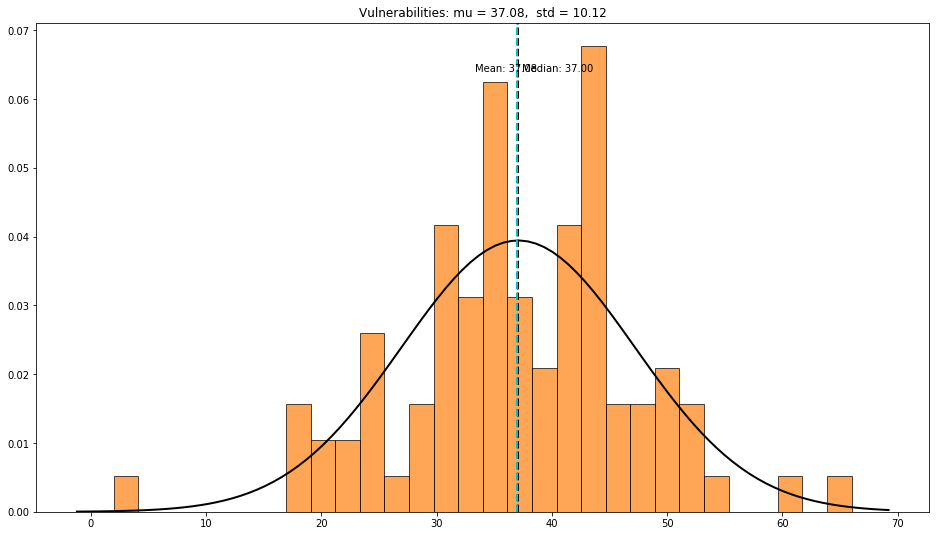

In [98]:
mu,std = norm.fit(TrimmedReleases_by_week['count'])

plt.hist(TrimmedReleases_by_week['count'].values, bins=30, density=True, linestyle='solid', color = "C1",alpha=0.7, ec="black")
xlim = plt.xlim()
x = np.linspace(xlim[0], xlim[1], 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Vulnerabilities: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

#Calc Mean and Display
plt.axvline(TrimmedReleases_by_week['count'].mean(), color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(TrimmedReleases_by_week['count'].mean()*.9, max_ylim*0.9, 'Mean: {:.2f}'.format(TrimmedReleases_by_week['count'].mean()))

#Calc Median and Display
plt.axvline(TrimmedReleases_by_week['count'].median(), color='c', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(TrimmedReleases_by_week['count'].median()*1.01, max_ylim*0.9, 'Median: {:.2f}'.format(TrimmedReleases_by_week['count'].median()))

plt.show()

In [99]:
rev_df
TrimmedRevisions = cleanByYearRelease(rev_df)
TrimmedRevisions_by_week = pd.DataFrame()
TrimmedRevisions_by_week['count'] = TrimmedRevisions['date'].value_counts().resample('w').apply('count')

### Revisions Plot

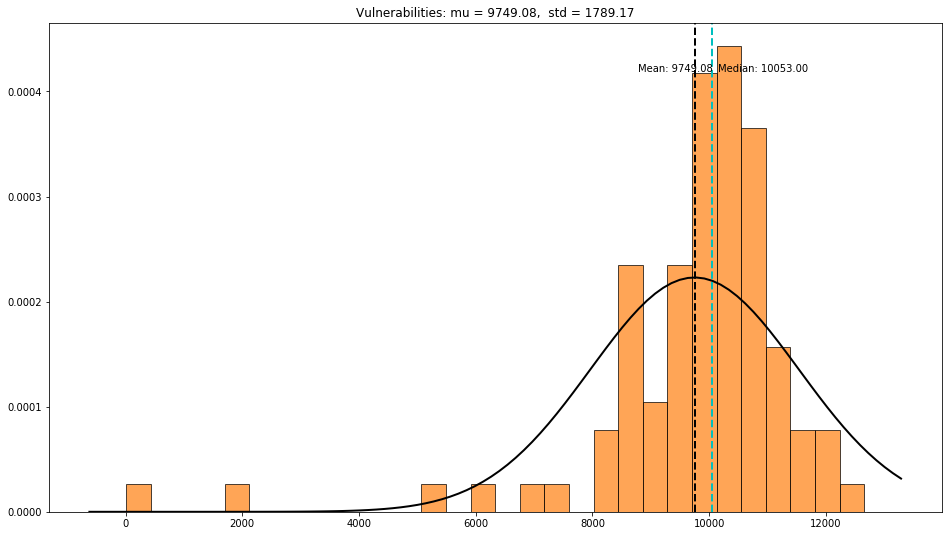

In [101]:
mu,std = norm.fit(TrimmedRevisions_by_week['count'])

plt.hist(TrimmedRevisions_by_week['count'].values, bins=30, density=True, linestyle='solid', color = "C1",alpha=0.7, ec="black")
xlim = plt.xlim()
x = np.linspace(xlim[0], xlim[1], 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Vulnerabilities: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

#Calc Mean and Display
plt.axvline(TrimmedRevisions_by_week['count'].mean(), color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(TrimmedRevisions_by_week['count'].mean()*.9, max_ylim*0.9, 'Mean: {:.2f}'.format(TrimmedRevisions_by_week['count'].mean()))

#Calc Median and Display
plt.axvline(TrimmedRevisions_by_week['count'].median(), color='c', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(TrimmedRevisions_by_week['count'].median()*1.01, max_ylim*0.9, 'Median: {:.2f}'.format(TrimmedRevisions_by_week['count'].median()))

plt.show()

# Removing Outliers Start

### Removing Outliers from Revisions

In [70]:
Q1 = TrimmedRevisions_by_week.quantile(0.25)
Q3 = TrimmedRevisions_by_week.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

count    1296.0
dtype: float64


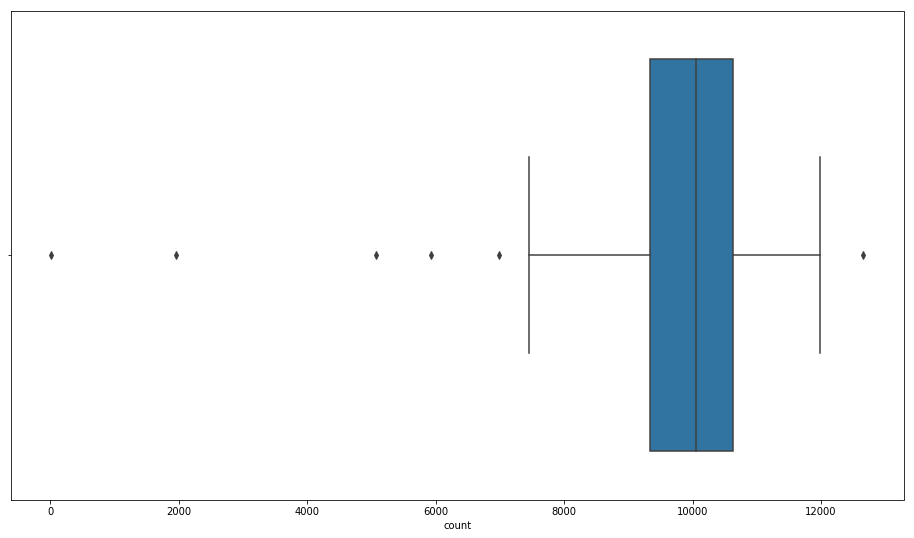

In [71]:
import seaborn as sns
sns.boxplot(x=TrimmedRevisions_by_week['count'])

In [75]:
boston_df_out = TrimmedRevisions_by_week[~((TrimmedRevisions_by_week < (Q1 - 1.5 * IQR)) |(TrimmedRevisions_by_week > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(85, 1)

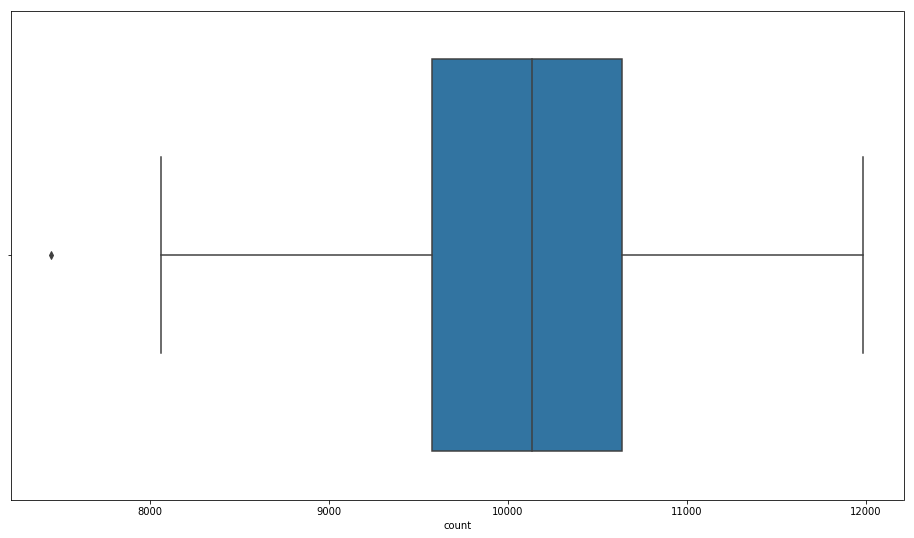

In [76]:
sns.boxplot(x=boston_df_out['count'])

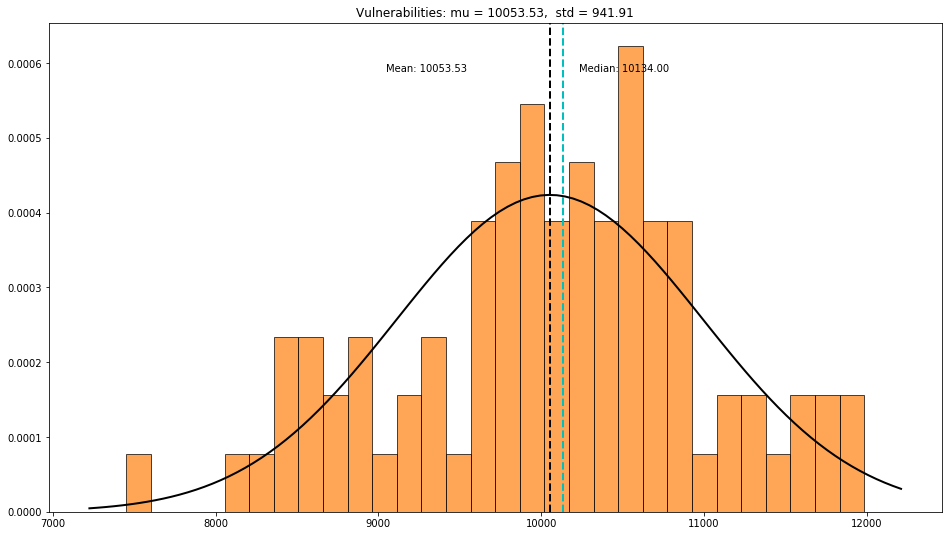

In [77]:
mu,std = norm.fit(boston_df_out['count'])

plt.hist(boston_df_out['count'].values, bins=30, density=True, linestyle='solid', color = "C1",alpha=0.7, ec="black")
xlim = plt.xlim()
x = np.linspace(xlim[0], xlim[1], 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Vulnerabilities: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

#Calc Mean and Display
plt.axvline(boston_df_out['count'].mean(), color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(boston_df_out['count'].mean()*.9, max_ylim*0.9, 'Mean: {:.2f}'.format(boston_df_out['count'].mean()))

#Calc Median and Display
plt.axvline(boston_df_out['count'].median(), color='c', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(boston_df_out['count'].median()*1.01, max_ylim*0.9, 'Median: {:.2f}'.format(boston_df_out['count'].median()))

plt.show()

### Removing Outliers from Releases

In [78]:
Q1 = TrimmedReleases_by_week.quantile(0.25)
Q3 = TrimmedReleases_by_week.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

count    13.0
dtype: float64


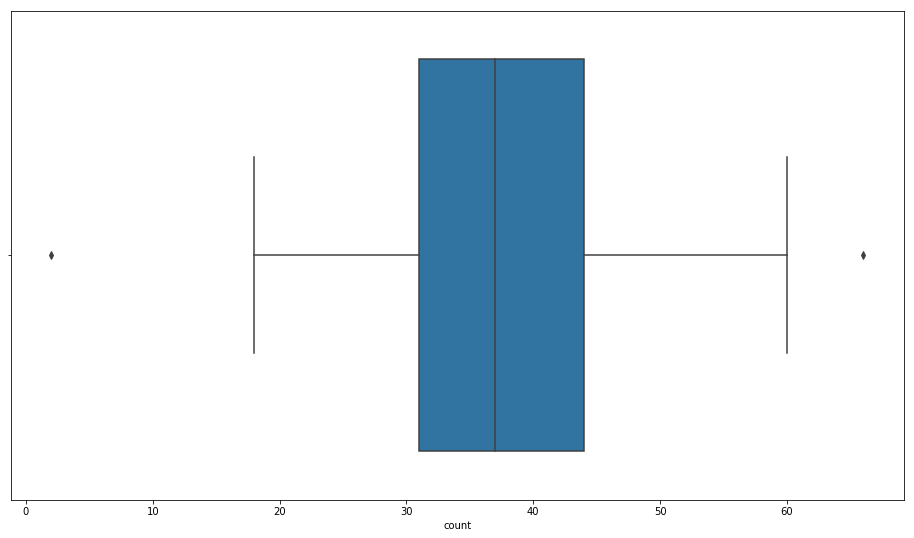

In [79]:
sns.boxplot(x=TrimmedReleases_by_week['count'])

In [80]:
boston_df_out = TrimmedReleases_by_week[~((TrimmedReleases_by_week < (Q1 - 1.5 * IQR)) |(TrimmedReleases_by_week > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(88, 1)

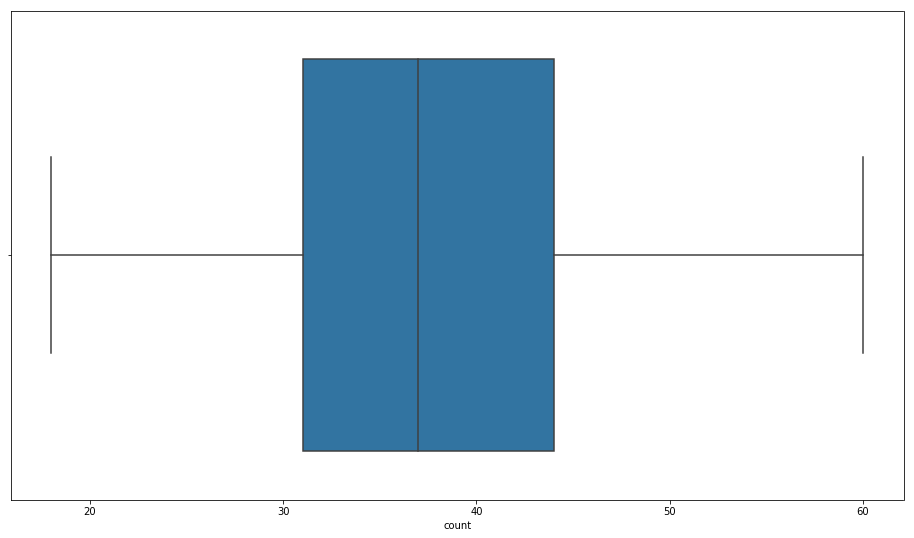

In [81]:
sns.boxplot(x=boston_df_out['count'])

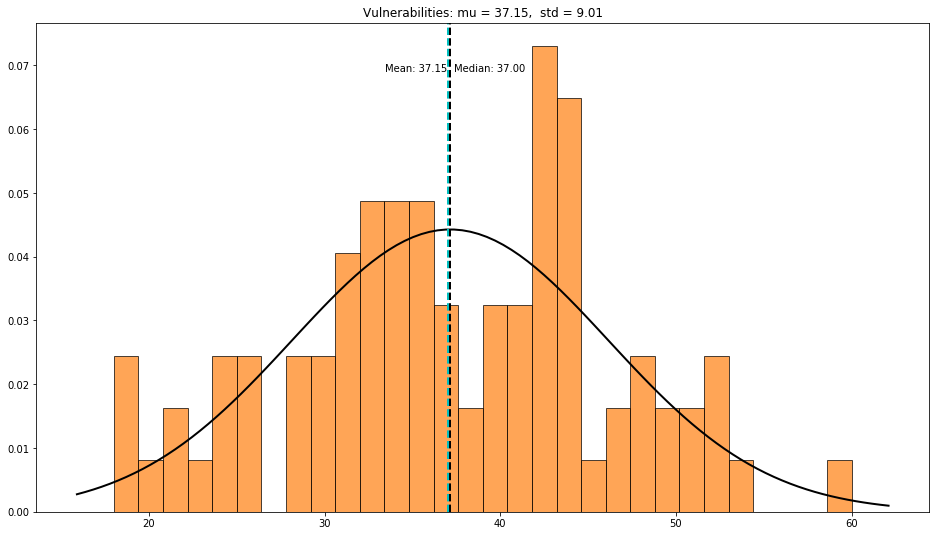

In [82]:
mu,std = norm.fit(boston_df_out['count'])

plt.hist(boston_df_out['count'].values, bins=30, density=True, linestyle='solid', color = "C1",alpha=0.7, ec="black")
xlim = plt.xlim()
x = np.linspace(xlim[0], xlim[1], 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Vulnerabilities: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

#Calc Mean and Display
plt.axvline(boston_df_out['count'].mean(), color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(boston_df_out['count'].mean()*.9, max_ylim*0.9, 'Mean: {:.2f}'.format(boston_df_out['count'].mean()))

#Calc Median and Display
plt.axvline(boston_df_out['count'].median(), color='c', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(boston_df_out['count'].median()*1.01, max_ylim*0.9, 'Median: {:.2f}'.format(boston_df_out['count'].median()))

plt.show()

# Removing Outliers End

### Run some hypothesis testing to statisticly determine that if there is an increase in revisions we should also expect an increase in releases...

- Some sort of Linear Regression TBD...